In [75]:
import numpy as np
import pandas as pd
import glob

In [76]:
df1 = pd.read_csv("01-jan-2021.csv")
df2 = pd.read_csv("02-feb-2021.csv")
df3 = pd.read_csv("03-maret-2021.csv")
df4 = pd.read_csv("04-april-2021.csv")
df5 = pd.read_csv("05-mei-2021.csv")
df6 = pd.read_csv("06-jun-2021.csv")
df7 = pd.read_csv("07-juli-2021.csv")
df8 = pd.read_csv("08-ags-2021.csv")
df9 = pd.read_csv("09-sep-2021.csv")
df10 = pd.read_csv("10-okt-2021.csv")
df11 = pd.read_csv("11-nov-2021.csv")
df12 = pd.read_csv("12-des-2021.csv")
df13 = pd.read_csv("2020/1-jan-2020.csv")
df14 = pd.read_csv("2020/2-feb-2020.csv")
df15 = pd.read_csv("2020/3-mar-2020.csv")
df16 = pd.read_csv("2020/4-april-2020.csv")
df17 = pd.read_csv("2020/5-mei-2020.csv")
df18 = pd.read_csv("2020/6-jun-2020.csv")
df19 = pd.read_csv("2020/7-jul-2020.csv")
df20 = pd.read_csv("2020/8-gst-2020.csv")
df21 = pd.read_csv("2020/9-sep-2020.csv")
df22 = pd.read_csv("2020/10-okt-2020.csv")
df23 = pd.read_csv("2020/11-nov-2020.csv")
df24 = pd.read_csv("2020/12-des-2020.csv")

In [77]:
frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24]

In [78]:
result = pd.concat(frames).drop_duplicates().reset_index(drop=True)

In [79]:
result

,tahun,bulan,destinasi_wisata,jumlah
0,2021,1,Taman Impian Jaya Ancol,0
1,2021,1,Taman Mini Indonesia Indah,0
2,2021,1,Taman Margasatwa Ragunan,0
3,2021,1,Monumen Nasional,0
4,2021,1,Museum Nasional,4
...,...,...,...,...
475,2020,12,PBB Setu babakan,0
476,2020,12,Museum Prasasti,0
477,2020,12,Planetarium,0
478,2020,12,Rumah si Pitung,0


In [80]:
datasets = result
datasets.head()


,tahun,bulan,destinasi_wisata,jumlah
0,2021,1,Taman Impian Jaya Ancol,0
1,2021,1,Taman Mini Indonesia Indah,0
2,2021,1,Taman Margasatwa Ragunan,0
3,2021,1,Monumen Nasional,0
4,2021,1,Museum Nasional,4


In [81]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             480 non-null    int64 
 1   bulan             480 non-null    int64 
 2   destinasi_wisata  480 non-null    object
 3   jumlah            480 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.1+ KB


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
group_2021 = datasets.groupby('destinasi_wisata')['jumlah'].sum().reset_index()

In [84]:
group_2021

,destinasi_wisata,jumlah
0,Kawasan Kota Tua,18621
1,Kepulauan Seribu,5211
2,Monumen Nasional,4339
3,Museum Bahari,640
4,Museum Joang,33
5,Museum Nasional,5974
6,Museum Prasasti,80
7,Museum Satria Mandala,0
8,Museum Sejarah Jakarta,4017
9,Museum Seni Rupa dan Keramik,866


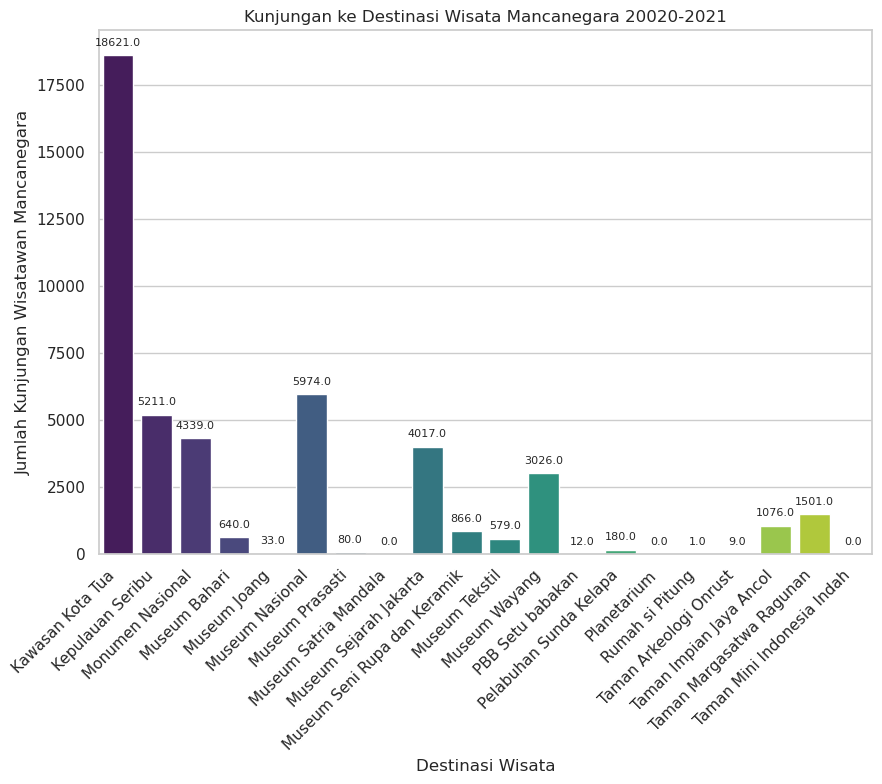

In [85]:
plt.figure(figsize=(9, 8))
ax = sns.barplot(x='destinasi_wisata', y='jumlah', data=group_2021, palette='viridis')
plt.title('Kunjungan ke Destinasi Wisata Mancanegara 20020-2021')
plt.xlabel('Destinasi Wisata')
plt.ylabel('Jumlah Kunjungan Wisatawan Mancanegara')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
               fontsize = 8)
    
plt.savefig('grafik_kunjungan.png', dpi=300)
plt.show()

# Analisa Deskriptif

In [86]:
descrivtif_stat = datasets.describe()

In [87]:
print(descrivtif_stat)

             tahun       bulan       jumlah
count   480.000000  480.000000   480.000000
mean   2020.500000    6.500000    96.177083
std       0.500522    3.455654   503.191609
min    2020.000000    1.000000     0.000000
25%    2020.000000    3.750000     0.000000
50%    2020.500000    6.500000     0.000000
75%    2021.000000    9.250000    11.000000
max    2021.000000   12.000000  7123.000000


# Visualisasi

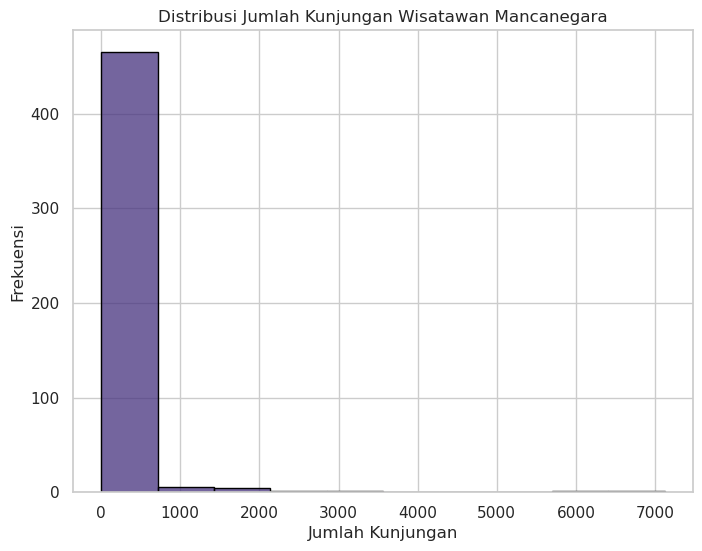

In [88]:
sns.set(style='whitegrid', palette='viridis')
plt.figure(figsize=(8, 6))
sns.histplot(datasets['jumlah'], bins=10, edgecolor='black')
plt.title("Distribusi Jumlah Kunjungan Wisatawan Mancanegara")
plt.xlabel("Jumlah Kunjungan")
plt.ylabel("Frekuensi")
plt.show()

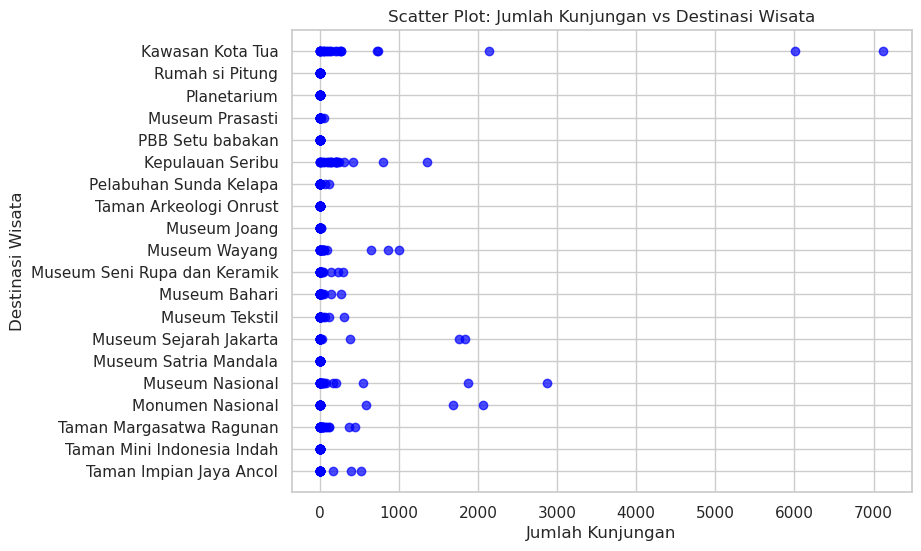

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(datasets['jumlah'], datasets['destinasi_wisata'], c='blue', alpha=0.7)
plt.title('Scatter Plot: Jumlah Kunjungan vs Destinasi Wisata')
plt.xlabel('Jumlah Kunjungan')
plt.ylabel('Destinasi Wisata')
plt.grid(True)

plt.savefig('02_distribusi.png', dpi=300)
plt.show()

In [90]:
group_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   destinasi_wisata  20 non-null     object
 1   jumlah            20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


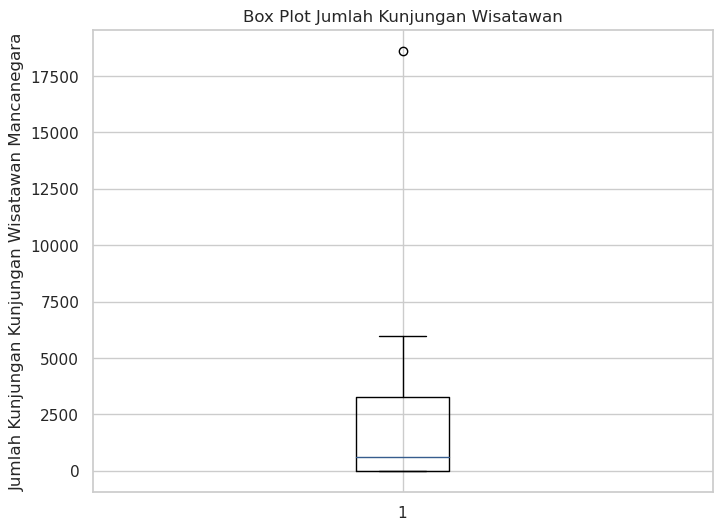

In [91]:
data = group_2021['jumlah']
plt.figure(figsize=(8,6))
box = plt.boxplot(data)

plt.title('Box Plot Jumlah Kunjungan Wisatawan')
plt.ylabel('Jumlah Kunjungan Kunjungan Wisatawan Mancanegara')
plt.show()


In [92]:
jumlah_kunjungan_per_destinasi = datasets.groupby('destinasi_wisata')['jumlah'].sum()

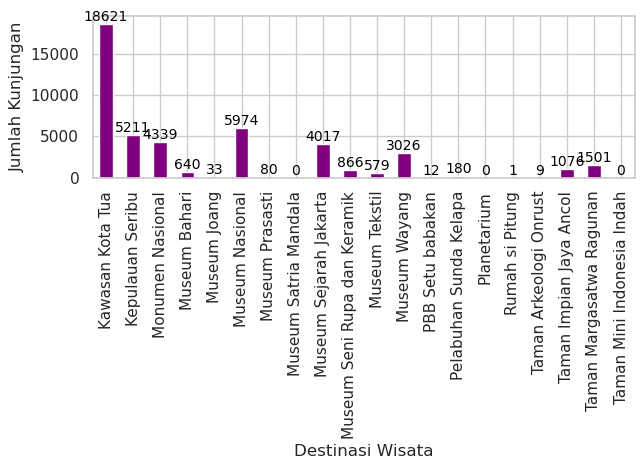

In [93]:
ax = jumlah_kunjungan_per_destinasi.plot(kind='bar', color='purple')

for i, v in enumerate(jumlah_kunjungan_per_destinasi):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.xlabel("Destinasi Wisata")
plt.ylabel("Jumlah Kunjungan")

plt.show()



In [94]:
datasets_copy = datasets.copy()

# UJI KORELASI

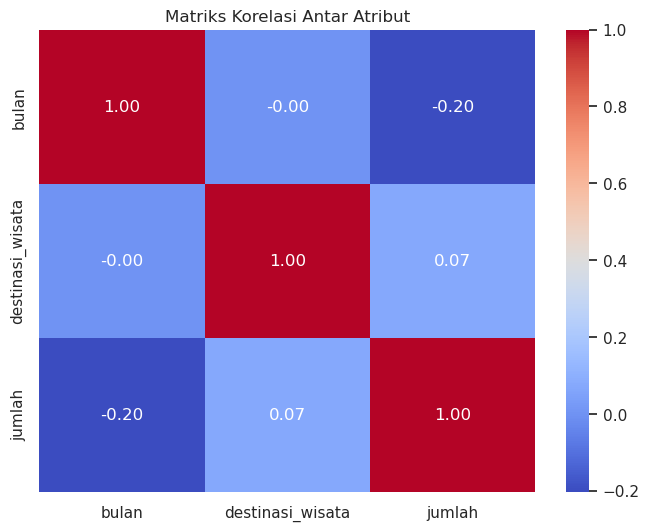

In [95]:
unique_des = datasets_copy['destinasi_wisata'].unique()
mapping = {dest: idx+1 for idx, dest in enumerate(unique_des)}

datasets_copy['destinasi_wisata'] = datasets['destinasi_wisata'].replace(mapping)

df = datasets_copy.iloc[:, 1:4]

corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Antar Atribut")

plt.savefig('03_korelasi.png', dpi=300)
plt.show()


# DETEKSI OUTLIER

In [96]:
df_o = datasets_copy['jumlah']
df_o = pd.DataFrame(df_o)
df_o

,jumlah
0,0
1,0
2,0
3,0
4,4
...,...
475,0
476,0
477,0
478,0


In [97]:
# Hitung Q1 dan Q3
Q1 = df_o['jumlah'].quantile(0.25)
Q3 = df_o['jumlah'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR



# Deteksi outlier
outliers = df_o[(df_o['jumlah'] < lower_bound) | (df_o['jumlah'] > upper_bound)]

print(outliers)

     jumlah
14      129
19       49
34      106
39      108
42       44
..      ...
454     138
459      45
462      31
468      30
474     214

[96 rows x 1 columns]


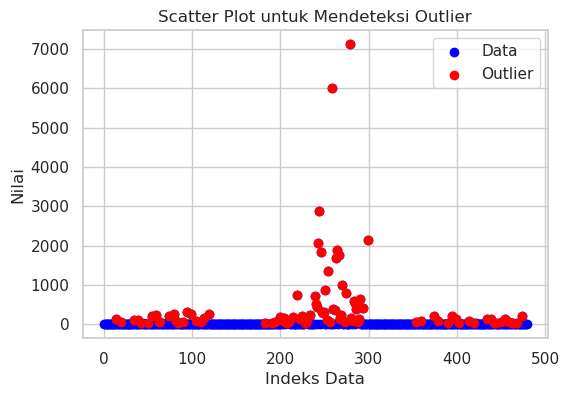

In [98]:
# Buat scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(range(len(df_o)), df_o['jumlah'], c='blue', label='Data')
plt.scatter(outliers.index, outliers['jumlah'], c='red', label='Outlier')
plt.title('Scatter Plot untuk Mendeteksi Outlier')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.legend()

plt.savefig('04_dataoutliner.png', dpi=300)
plt.show()

In [99]:
datasets_normalized = (df_o - df_o.min()) / (df_o.max() - df_o.min())
df_o = datasets_normalized

In [100]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=2)

dbscan.fit(df_o)

DBSCAN(eps=5, min_samples=2)

In [101]:
outliers = df_o[dbscan.labels_ == 0]

In [102]:
print(outliers)

       jumlah
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000562
..        ...
475  0.000000
476  0.000000
477  0.000000
478  0.000000
479  0.000000

[480 rows x 1 columns]


In [103]:
df_o = outliers

In [104]:
df_o

,jumlah
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000562
...,...
475,0.000000
476,0.000000
477,0.000000
478,0.000000


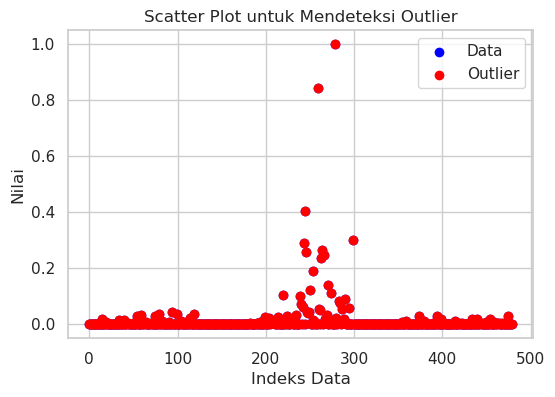

In [105]:
plt.figure(figsize=(6, 4))
plt.scatter(range(len(df_o)), df_o['jumlah'], c='blue', label='Data')
plt.scatter(outliers.index, outliers['jumlah'], c='red', label='Outlier')
plt.title('Scatter Plot untuk Mendeteksi Outlier')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.legend()

plt.savefig('05_DBSCAN_dataout.png', dpi=300)
plt.show()

In [106]:
datasets['Jumlah'] = df_o 

In [107]:
datasets_copy2 = datasets.copy()

In [108]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [109]:
label_encoder = LabelEncoder()

In [110]:
df = datasets.copy()

In [111]:
destinasi = df['destinasi_wisata'] 
jumlah = df['Jumlah']

data = pd.concat([df['destinasi_wisata'], df['Jumlah']], axis=1)


In [112]:
data['destinasi'] = label_encoder.fit_transform(data['destinasi_wisata'])

X = data[['Jumlah','destinasi']]

In [113]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/home/givaide/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/givaide/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/givaide/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/givaide/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/givaide/an

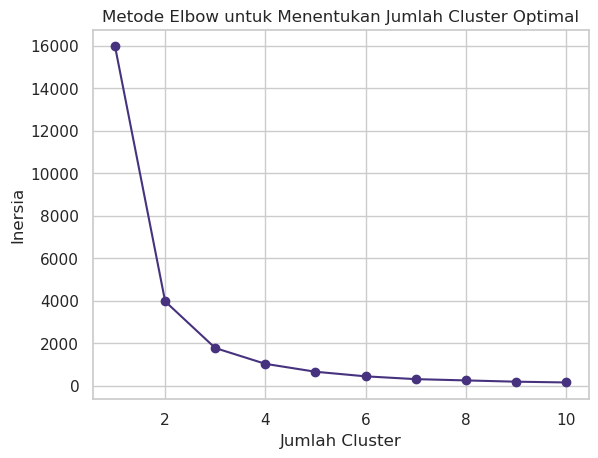

In [114]:
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X[['Jumlah', 'destinasi']])
    inertia_values.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')

plt.savefig('06_penentuan_jumlahK.png', dpi=300)
plt.show()

In [115]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

/home/givaide/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [116]:
df['Cluster'] = kmeans.labels_


In [117]:
print(df)

     tahun  bulan            destinasi_wisata  jumlah    Jumlah  Cluster
0     2021      1     Taman Impian Jaya Ancol       0  0.000000        1
1     2021      1  Taman Mini Indonesia Indah       0  0.000000        1
2     2021      1    Taman Margasatwa Ragunan       0  0.000000        1
3     2021      1            Monumen Nasional       0  0.000000        0
4     2021      1             Museum Nasional       4  0.000562        0
..     ...    ...                         ...     ...       ...      ...
475   2020     12            PBB Setu babakan       0  0.000000        3
476   2020     12             Museum Prasasti       0  0.000000        3
477   2020     12                 Planetarium       0  0.000000        1
478   2020     12             Rumah si Pitung       0  0.000000        1
479   2020     12            Kawasan Kota Tua       0  0.000000        0

[480 rows x 6 columns]


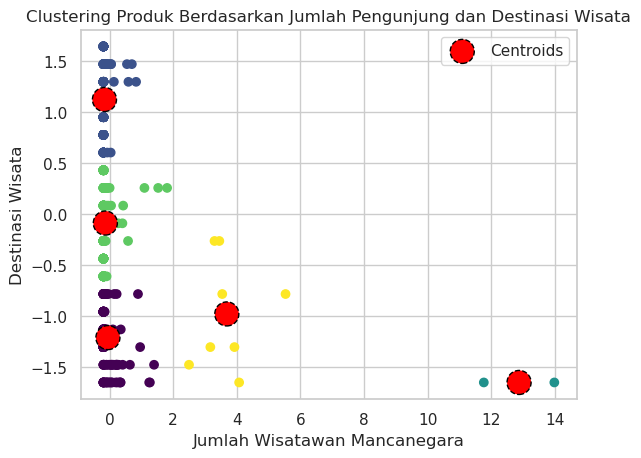

In [142]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='o', linewidth=1, edgecolors='black', linestyle='dashed')
plt.xlabel('Jumlah Wisatawan Mancanegara')
plt.ylabel('Destinasi Wisata')
plt.title('Clustering Produk Berdasarkan Jumlah Pengunjung dan Destinasi Wisata')
plt.legend()
plt.savefig('07_visualisai_cluster.png', dpi=300)
plt.show()

In [143]:
cluster_tables = []

for cluster_label in range(k):
    cluster_data = df[df['Cluster'] == cluster_label].drop(columns=['Cluster'])
    cluster_tables.append(cluster_data)

In [144]:
for i, cluster_data in enumerate(cluster_tables):
    print(f"Cluster {i + 1}:")
    print(cluster_data)
    print()

Cluster 1:
     tahun  bulan  destinasi_wisata  jumlah    Jumlah
3     2021      1  Monumen Nasional       0  0.000000
4     2021      1   Museum Nasional       4  0.000562
8     2021      1     Museum Bahari      15  0.002106
11    2021      1      Museum Joang       0  0.000000
14    2021      1  Kepulauan Seribu     129  0.018110
..     ...    ...               ...     ...       ...
464   2020     12   Museum Nasional      25  0.003510
468   2020     12     Museum Bahari      30  0.004212
471   2020     12      Museum Joang       0  0.000000
474   2020     12  Kepulauan Seribu     214  0.030044
479   2020     12  Kawasan Kota Tua       0  0.000000

[136 rows x 5 columns]

Cluster 2:
     tahun  bulan            destinasi_wisata  jumlah    Jumlah
0     2021      1     Taman Impian Jaya Ancol       0  0.000000
1     2021      1  Taman Mini Indonesia Indah       0  0.000000
2     2021      1    Taman Margasatwa Ragunan       0  0.000000
12    2021      1      Taman Arkeologi Onrust    

In [145]:
df_clustered = df[['destinasi_wisata', 'Cluster']]
summary_table = df.groupby('Cluster')['Jumlah'].describe()
summary_table = summary_table.join(df_clustered.groupby('Cluster')['destinasi_wisata'].apply(lambda x: ', '.join(x)))
pd.set_option('display.max_columns', None)
print(summary_table)

         count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
0        136.0  0.009989  0.020521  0.000000  0.000000  0.000140  0.010494   
1        168.0  0.002312  0.009797  0.000000  0.000000  0.000000  0.000000   
2          2.0  0.921803  0.110588  0.843605  0.882704  0.921803  0.960901   
3        166.0  0.004224  0.017285  0.000000  0.000000  0.000000  0.000702   
4          8.0  0.273673  0.062663  0.189808  0.244069  0.260284  0.293205   

              max                                   destinasi_wisata  
Cluster                                                               
0        0.112312  Monumen Nasional, Museum Nasional, Museum Baha...  
1        0.072441  Taman Impian Jaya Ancol, Taman Mini Indonesia ...  
2        1.000000                 Kawasan Kota Tua, Kawasan Kota Tua  
3        0.141233  Museum Satria Mandala, Museum Sejarah Jakarta,...  
4        0.403903  Monumen 

In [146]:
summary_table.to_csv('summary_table.csv')

In [147]:
summary_table.to_excel('summary_table_E.xlsx', index=False)

# Silhouette Score

In [148]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3842495870930044


# Inertia (Within-Cluster Sum of Squares): 

In [149]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 86.48353722436318


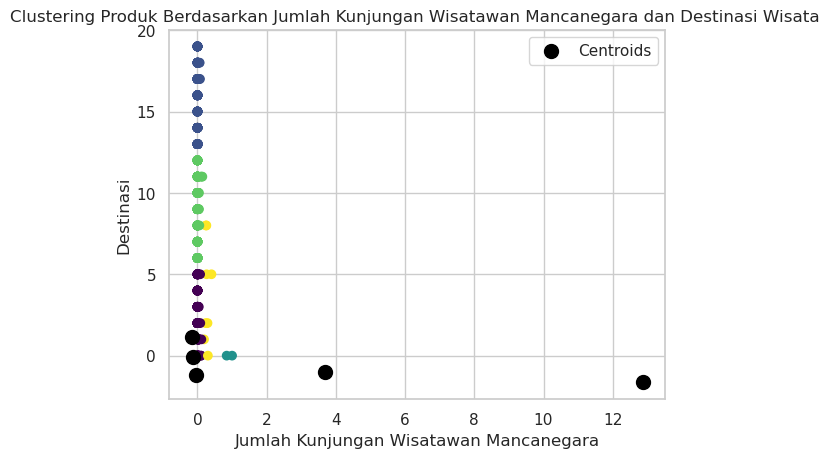

In [150]:
import matplotlib.pyplot as plt
plt.scatter(X['Jumlah'], X['destinasi'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.xlabel('Jumlah Kunjungan Wisatawan Mancanegara')
plt.ylabel('Destinasi')
plt.title('Clustering Produk Berdasarkan Jumlah Kunjungan Wisatawan Mancanegara dan Destinasi Wisata ')
plt.legend()
plt.show()

# Davies-Bouldin Index: 

In [151]:
from sklearn.metrics import davies_bouldin_score

b_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {b_index}")

Davies-Bouldin Index: 1.6085951813909276
